In [589]:
import tensorflow as tf
import imageio
import natsort
import glob
import PIL
import IPython
import numpy as np
import matplotlib.pyplot as plt
from beta_VAE.model import CVAE
import train
from tensorflow_probability import distributions as tfd
from beta_VAE.dataset import preprocess_images
from tensorflow.linalg import matvec
from tensorflow_addons.image import rotate
import os
import random

In [713]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./beta_VAE/image/2_27/method1/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [714]:
def generate_and_save_images(predictions, degree, dire):
    fig = plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')
    file_dir = './image/'+ dire
    if not os.path.exists(file_dir):
        os.makedirs(file_dir)
    plt.savefig(file_dir +'/image_at_epoch_{:04d}.png'.format(degree))
    plt.close()


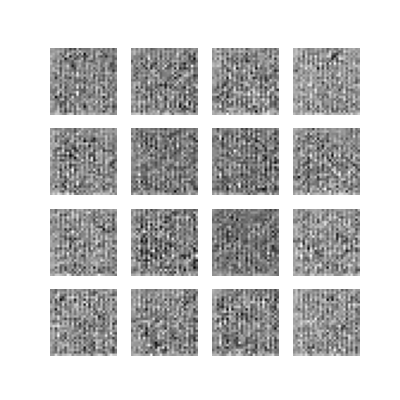

In [715]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

In [716]:
model = CVAE(latent_dim=16, beta=3)
checkpoint = tf.train.Checkpoint(model=model)
checkpoint.restore("./beta_VAE/checkpoints/2_27/method1/ckpt-10")

In [784]:
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
test_images = preprocess_images(test_images)

In [786]:
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(10000).batch(32))

num_examples_to_generate = 16

In [787]:
for test_batch in test_dataset.take(1):
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]

In [720]:
def generate_images(data):
    fig = plt.figure(figsize=(4, 4))
    for i in range(data.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(data[i, :, :, 0], cmap='gray')
        plt.axis('off')
    plt.show()

# original image

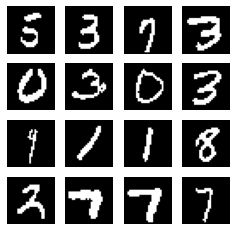

In [788]:
generate_images(test_sample)

# After Model translate

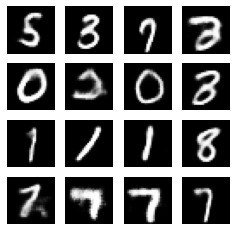

In [789]:
mean, logvar = model.encode(test_sample)
z = model.reparameterize(mean, logvar)
predictions = model.sample(z)
generate_images(predictions)

In [790]:
mean, logvar = model.encode(test_sample)
r_m = np.identity(model.latent_dim)
z = model.reparameterize(mean, logvar)
for i in range (10, 120, 10):  
    theta = np.radians(i)
    c, s = np.cos(theta), np.sin(theta)
    r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
    rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
    phi_z = model.decode(rota_z)
    generate_and_save_images(phi_z, i, 'test1')

In [791]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test1/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


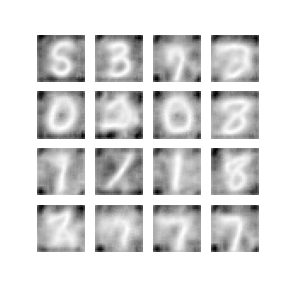

In [792]:
embed.embed_file(anim_file)

In [728]:
for i in range (10, 120, 10):
    r_x = rotate(test_sample, -i)
    mean, logvar = model.encode(test_sample)
    r_m = np.identity(model.latent_dim)
    z = model.reparameterize(mean, logvar)
    theta = np.radians(i)
    c, s = np.cos(theta), np.sin(theta)
    r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
    rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
    phi_z = model.decode(rota_z)
    generate_and_save_images(phi_z, i, 'test2')

In [729]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test2/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


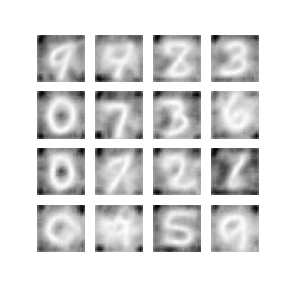

In [730]:
embed.embed_file(anim_file)

In [169]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test_dir1/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

In [555]:
for i in range(6, 10):
    model = CVAE(latent_dim=8, beta=1, gamma=i)
    checkpoint = tf.train.Checkpoint(model=model)
    checkpoint.restore("./factorVAE/checkpoints/2_25/gamma" + str(i) + "/ckpt-10")
    mean, logvar = model.encode(test_sample)
    r_m = np.identity(model.latent_dim)
    z = model.reparameterize(mean, logvar)
    for j in range(10, 120, 10):
        theta = np.radians(j)
        c, s = np.cos(theta), np.sin(theta)
        r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, s], [-s, c]
        rota_z = matvec(tf.cast(r_m, dtype=tf.float32), z)
        phi_z = model.decode(rota_z)
        generate_and_save_images(phi_z, j, 'test3' + "/beta_test" + str(i))

In [564]:
anim_file = 'rote_ori.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('./image/test3/beta_test9/image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)


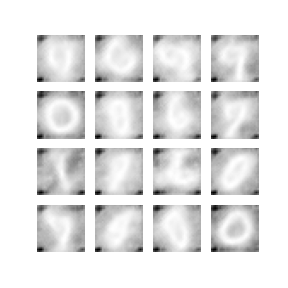

In [565]:
embed.embed_file(anim_file)

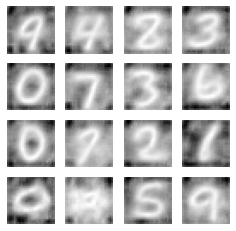

In [779]:
theta = 55
degree = np.radians(theta)
r_x = rotate(test_sample, degree)
r_mean, r_logvar = model.encode(r_x)
r_z = model.reparameterize(r_mean, r_logvar)
r_degree = np.arctan(r_z[:, 1]/r_z[:, 0])/np.pi * 180
c, s = np.cos(degree), np.sin(degree)
r_m = np.identity(16)
r_m[0, [0, 1]], r_m[1, [0, 1]] = [c, -s], [s, c]
new_degree = matvec(tf.cast(r_m, dtype=tf.float32), ori_z)
ori_mean, ori_logvar = model.encode(test_sample)
o_z = model.reparameterize(ori_mean, ori_logvar)
o_degree = np.arctan(o_z[:, 1]/o_z[:, 0])/np.pi * 180
r_x = model.decode(new_degree)
generate_images(r_x)

In [780]:
test1 =  o_degree - r_degree

In [781]:
test1

array([  51.68757  ,   41.017006 ,   48.680496 ,   49.922073 ,
         32.34152  ,   46.905445 ,   56.71853  ,   23.576675 ,
         46.209023 , -123.7529   ,   51.544483 , -123.19639  ,
        -35.29976  ,   -3.1203804,   50.812874 ,   23.613789 ],
      dtype=float32)

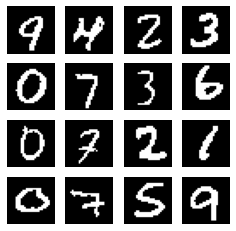

In [782]:
degree = np.radians(0)
r_x = rotate(test_sample, degree)
generate_images(r_x)

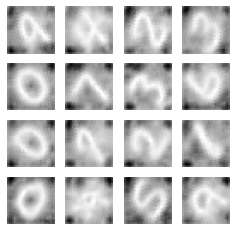

In [760]:
ori_mean, ori_logvar = model.encode(r_x)
ori_z = model.reparameterize(ori_mean, ori_logvar)
e_x = model.decode(ori_z)
generate_images(e_x)

In [274]:
from itertools import product
z_shape = z.shape
#     indices = list(range(z_shape[1])) * z_shape[0]
#     swap_index_pair = np.random.randint(0, latent_dim, size=(z_shape[0], 2), dtype=np.int32)
indices = list(range(z_shape[1]))
swap_index_pair = np.random.choice(indices, size=32, replace=False)
tmp = indices[swap_index_pair[0]]
indices[swap_index_pair[0]] = indices[swap_index_pair[1]]
indices[swap_index_pair[1]] = tmp
for i in range(len(swap_index_pair)):
         tmp = indices[swap_index_pair[i, 0]]
         indices[swap_index_pair[i, 1]] = indices[swap_index_pair[i, 0]]
         indices[swap_index_pair[i, 1]] = tmp
nd_indices = [
    [i, j] for i, j in product(range(z_shape[0]), indices)
]
    
z_shuffled = tf.reshape(tf.gather_nd(z, tf.convert_to_tensor(nd_indices)), z_shape)

SyntaxError: invalid syntax (<ipython-input-274-e25a6c931872>, line 9)

In [586]:
(data_set, _), (_, _) = tf.keras.datasets.mnist.load_data()

In [590]:
data_images = preprocess_images(data_set)

In [591]:
test = data_images[:1000]

In [593]:
test.shape

(1000, 28, 28, 1)